https://www.kaggle.com/datasets/rcratos/heart-disease-data-compiled-from-uci/data

Prepare data, split data into train and test

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split

In [44]:
df = pd.read_csv("/content/UCI_Heart_Disease_Dataset_Combined.csv")

In [45]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,0
1,49,0,2,160,180,0,0,156,0,1.0,1
2,37,1,1,130,283,0,1,98,0,0.0,0
3,48,0,3,138,214,0,0,108,1,1.5,1
4,54,1,2,150,195,0,0,122,0,0.0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2943 non-null   int64  
 1   Sex             2943 non-null   int64  
 2   ChestPainType   2943 non-null   int64  
 3   RestingBP       2943 non-null   int64  
 4   Cholesterol     2943 non-null   int64  
 5   FastingBS       2943 non-null   int64  
 6   RestingECG      2943 non-null   int64  
 7   MaxHR           2943 non-null   int64  
 8   ExerciseAngina  2943 non-null   int64  
 9   Oldpeak         2943 non-null   float64
 10  HeartDisease    2943 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 253.0 KB


In [47]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
HeartDisease      0
dtype: int64

In [48]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000
mean,52.381923,0.748556,1.363575,138.698267,253.515121,0.225280,0.626911,144.040095,0.412504,1.570031,0.548420
std,13.037189,0.433917,1.142614,24.623198,112.724716,0.417838,0.713650,28.446327,0.492369,1.585102,0.497735
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,44.000000,0.000000,0.000000,120.500000,204.000000,0.000000,0.000000,124.000000,0.000000,0.100000,0.000000
50%,54.000000,1.000000,1.000000,134.000000,248.000000,0.000000,0.000000,145.000000,0.000000,1.200000,1.000000
75%,61.000000,1.000000,2.000000,150.000000,306.000000,0.000000,1.000000,165.000000,1.000000,2.400000,1.000000
max,80.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'ChestPainType'}>],
       [<Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'FastingBS'}>],
       [<Axes: title={'center': 'RestingECG'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'ExerciseAngina'}>],
       [<Axes: title={'center': 'Oldpeak'}>,
        <Axes: title={'center': 'HeartDisease'}>, <Axes: >]], dtype=object)

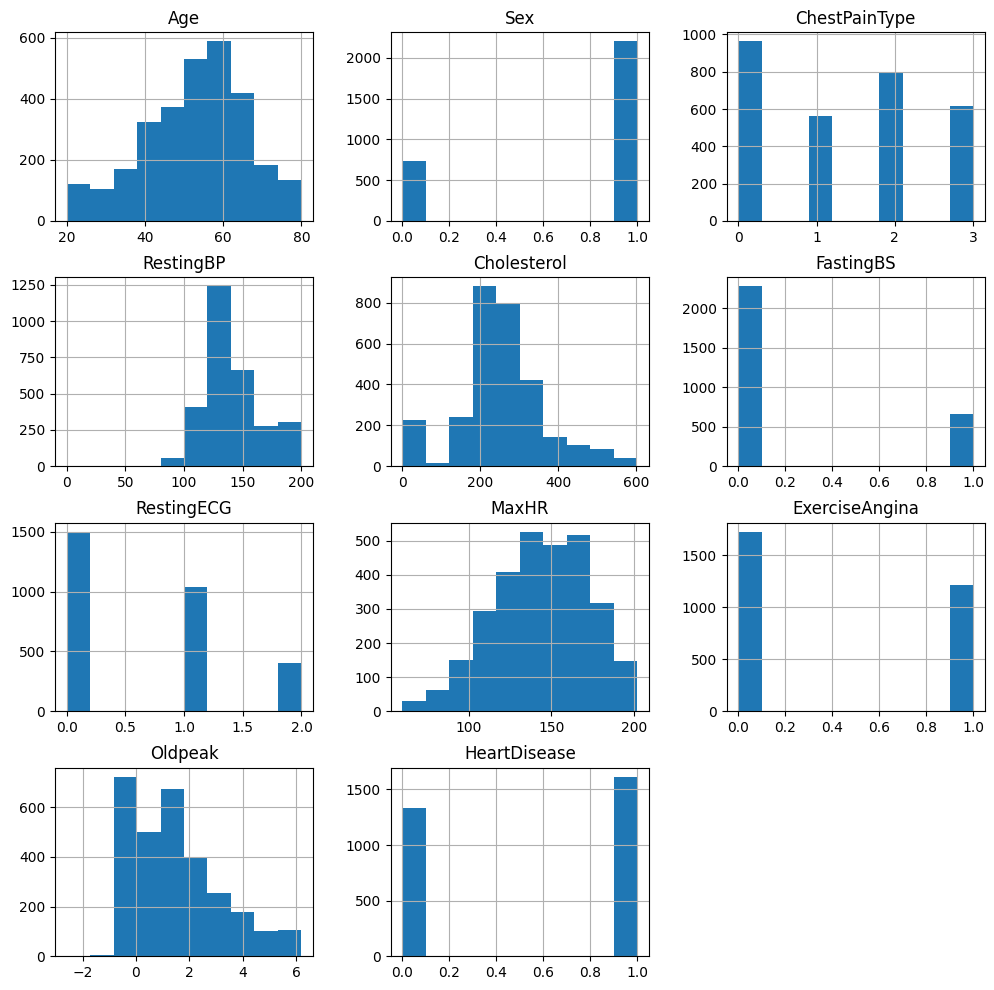

In [49]:
df.hist(figsize=(12, 12))

ExerciseAngina
1 stands for yes and 0 stands for no.

In [50]:
df.corrwith(df["HeartDisease"]).sort_values(ascending=False)

HeartDisease      1.000000
ChestPainType     0.416689
RestingECG        0.218335
RestingBP         0.206176
FastingBS         0.191872
MaxHR             0.096322
Oldpeak           0.028767
Age               0.002806
Cholesterol       0.002191
ExerciseAngina    0.000303
Sex              -0.004988
dtype: float64

In [51]:
correlation_matrix=df.corr()

In [52]:
correlation_matrix

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
Age,1.000000,-0.033190,0.057691,0.014640,-0.035951,0.072243,0.042282,-0.177195,0.028136,-0.024171,0.002806
Sex,-0.033190,1.000000,0.070645,-0.036308,-0.142401,0.063193,-0.030828,-0.053019,0.095861,0.173323,-0.004988
ChestPainType,0.057691,0.070645,1.000000,0.003792,-0.154915,0.131675,0.087622,-0.051618,-0.027417,-0.113548,0.416689
RestingBP,0.014640,-0.036308,0.003792,1.000000,0.236897,0.189041,0.148066,0.027595,0.079352,0.253708,0.206176
Cholesterol,-0.035951,-0.142401,-0.154915,0.236897,1.000000,0.076073,0.102507,0.122891,0.048416,0.204556,0.002191
FastingBS,0.072243,0.063193,0.131675,0.189041,0.076073,1.000000,0.071081,-0.006079,0.057016,0.078454,0.191872
RestingECG,0.042282,-0.030828,0.087622,0.148066,0.102507,0.071081,1.000000,0.066472,0.001867,0.094289,0.218335
MaxHR,-0.177195,-0.053019,-0.051618,0.027595,0.122891,-0.006079,0.066472,1.000000,-0.204647,-0.056453,0.096322
ExerciseAngina,0.028136,0.095861,-0.027417,0.079352,0.048416,0.057016,0.001867,-0.204647,1.000000,0.222805,0.000303
Oldpeak,-0.024171,0.173323,-0.113548,0.253708,0.204556,0.078454,0.094289,-0.056453,0.222805,1.000000,0.028767


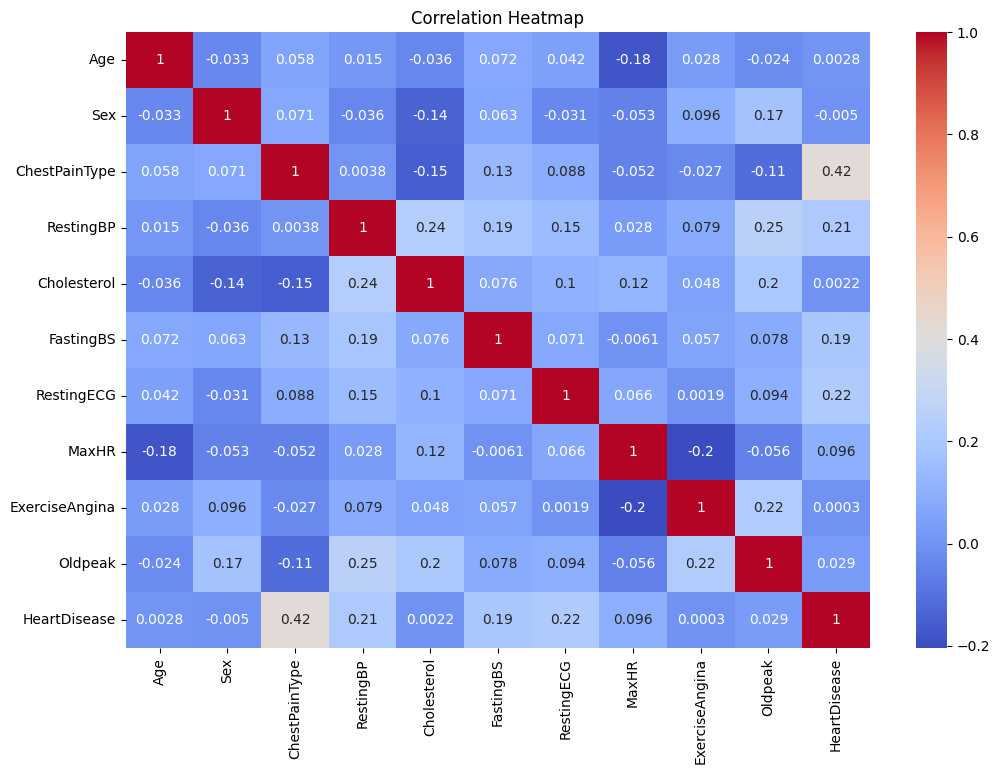

In [53]:
plt.figure(figsize=(12, 8))
seaborn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [54]:
X, y = df.drop("HeartDisease", axis=1), df["HeartDisease"]

In [55]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak
0,40,1,1,140,289,0,0,172,0,0.0
1,49,0,2,160,180,0,0,156,0,1.0
2,37,1,1,130,283,0,1,98,0,0.0
3,48,0,3,138,214,0,0,108,1,1.5
4,54,1,2,150,195,0,0,122,0,0.0


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [57]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (2207, 10)
X_test shape (736, 10)
y_train shape (2207,)
y_test shape (736,)


Train models

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [75]:
scale_pipeline = Pipeline([
        ("scaler", StandardScaler())
])

In [86]:
linear_pipeline = Pipeline([
    ("preprossecor", scale_pipeline),
    ("regressor", LogisticRegression())
])


gradient_pipeline = Pipeline([
    ("preprossecor", scale_pipeline),
    ("regressor", GradientBoostingClassifier())
])

svc_pipeline = Pipeline([
    ("preprossecor", scale_pipeline),
    ("regressor", SVC(kernel='linear'))
])

randomforest_pipeline = Pipeline([
    ("preprossecor", scale_pipeline),
    ("regressor", RandomForestClassifier())
])

decision_pipeline = Pipeline([
    ("preprossecor", scale_pipeline),
    ("regressor", DecisionTreeClassifier())
])

knc_pipeline = Pipeline([
    ("preprossecor", scale_pipeline),
    ("regressor", KNeighborsClassifier())
])

In [93]:
pipelines = [linear_pipeline, gradient_pipeline, svc_pipeline, randomforest_pipeline, decision_pipeline, knc_pipeline]

In [102]:
names = [
    "Logistic Regression",
    "Gradient Boosting",
    "Support Vector Machine",
    "Random Forest",
    "Decision Tree",
    "K-Nearest Neighbors",
]

In [94]:
for pipeline in pipelines:
  pipeline.fit(X_train, y_train)

In [105]:
cms = []
for i, pipeline in enumerate(pipelines):
  y_pred = pipeline.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  score = pipeline.score(X_test, y_test)
  print(f"Pipeline {names[i]} mse = {round(mse, 2)}, score = {round(score, 2)}")
  cm = confusion_matrix(y_test, y_pred)
  cms.append(cm)

Pipeline Logistic Regression mse = 0.26, score = 0.74
Pipeline Gradient Boosting mse = 0.22, score = 0.78
Pipeline Support Vector Machine mse = 0.28, score = 0.72
Pipeline Random Forest mse = 0.12, score = 0.88
Pipeline Decision Tree mse = 0.17, score = 0.83
Pipeline K-Nearest Neighbors mse = 0.23, score = 0.77


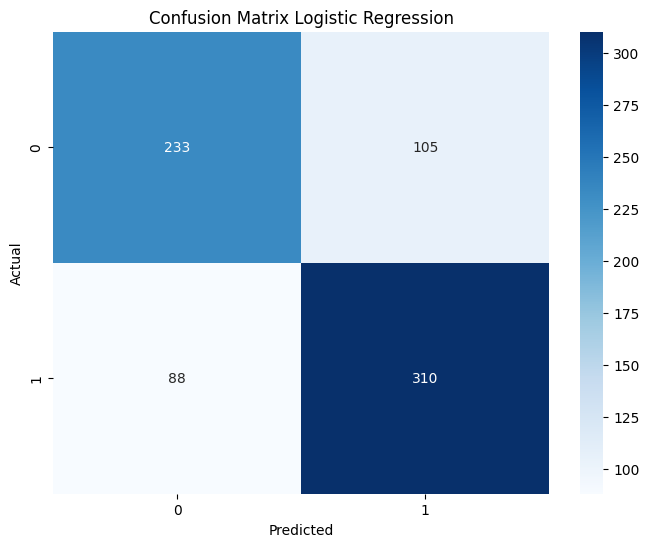

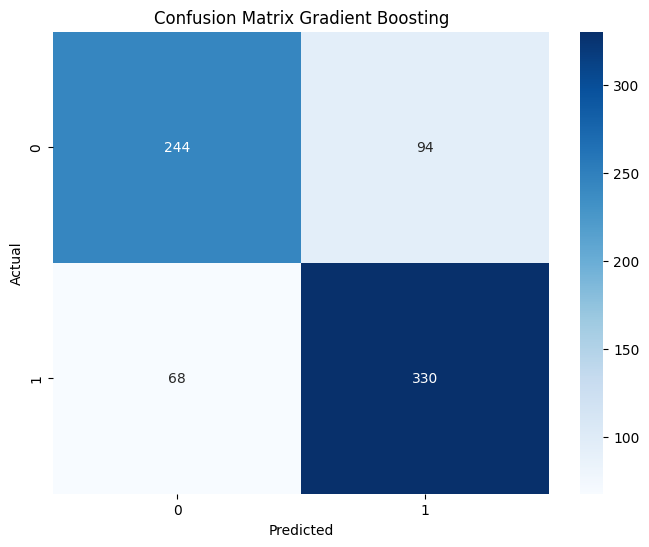

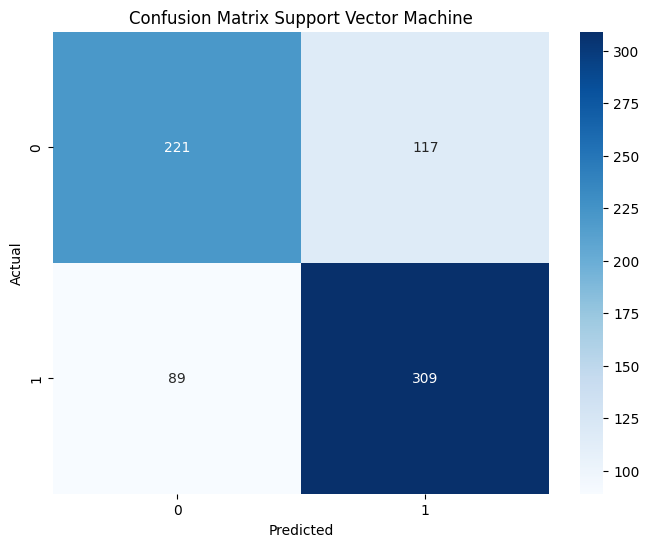

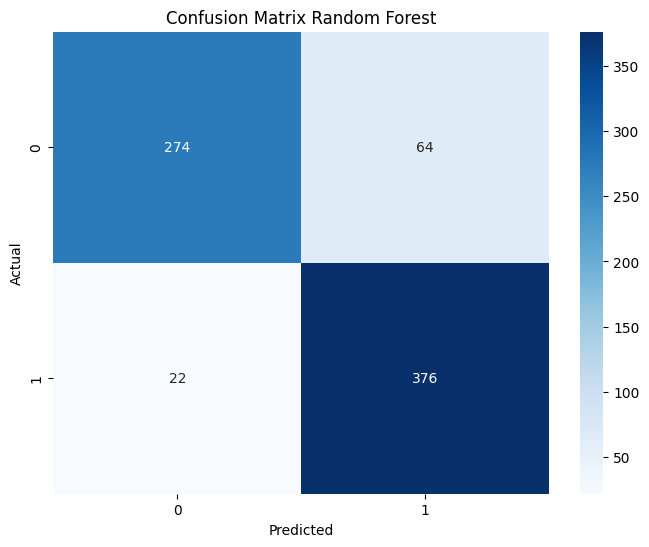

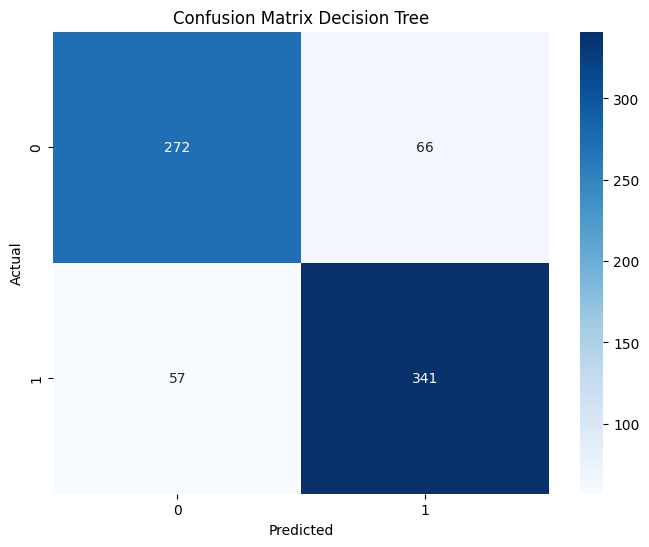

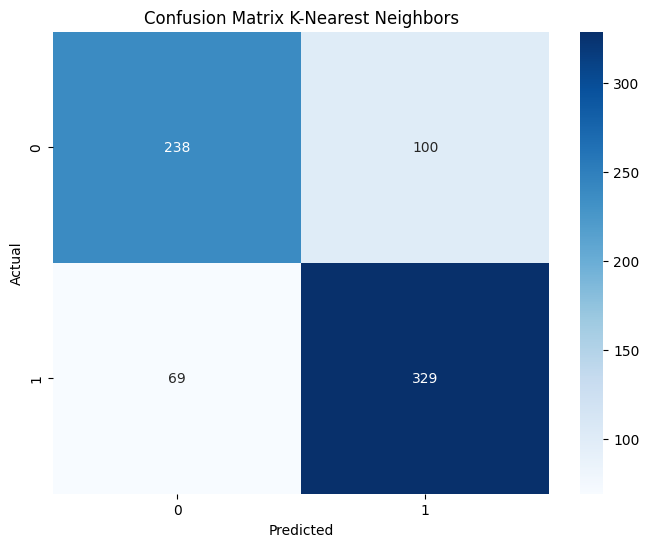

In [108]:
for i, cm in enumerate(cms):
  plt.figure(figsize=(8, 6))
  seaborn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(f'Confusion Matrix {names[i]}')
  plt.show()

In [115]:
from tensorflow import keras

In [117]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [148]:
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation="sigmoid"),
])

In [149]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                704       
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 128)               8320      
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 256)               33024     
                                                                 
 dropout_17 (Dropout)        (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 1)                

In [150]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

In [151]:
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
checkpoint = keras.callbacks.ModelCheckpoint("best_model.keras", monitor='val_accuracy', save_best_only=True, mode='max')

In [152]:
history = model.fit(X_train_scaled, y_train, epochs=40, validation_split=0.2, callbacks=[early_stop, checkpoint])

Epoch 1/40
56/56 [==============================] - 2s 8ms/step - loss: 0.6463 - accuracy: 0.6091 - val_loss: 0.5850 - val_accuracy: 0.7195
Epoch 2/40
56/56 [==============================] - 0s 4ms/step - loss: 0.5705 - accuracy: 0.7008 - val_loss: 0.5603 - val_accuracy: 0.6946
Epoch 3/40
56/56 [==============================] - 0s 5ms/step - loss: 0.5769 - accuracy: 0.6975 - val_loss: 0.5416 - val_accuracy: 0.7240
Epoch 4/40
56/56 [==============================] - 0s 7ms/step - loss: 0.5496 - accuracy: 0.7229 - val_loss: 0.5381 - val_accuracy: 0.7330
Epoch 5/40
56/56 [==============================] - 0s 7ms/step - loss: 0.5402 - accuracy: 0.7207 - val_loss: 0.5333 - val_accuracy: 0.7376
Epoch 6/40
56/56 [==============================] - 0s 6ms/step - loss: 0.5188 - accuracy: 0.7388 - val_loss: 0.5258 - val_accuracy: 0.7308
Epoch 7/40
56/56 [==============================] - 0s 7ms/step - loss: 0.5189 - accuracy: 0.7496 - val_loss: 0.5268 - val_accuracy: 0.7398
Epoch 8/40
56/56 [==

In [153]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)

23/23 [==============================] - 0s 4ms/step - loss: 0.4916 - accuracy: 0.7649


In [154]:
best_model = keras.models.load_model('best_model.keras')

In [155]:
best_model.evaluate(X_test_scaled, y_test)

23/23 [==============================] - 1s 5ms/step - loss: 0.4964 - accuracy: 0.7649


[0.4964412748813629, 0.7649456262588501]

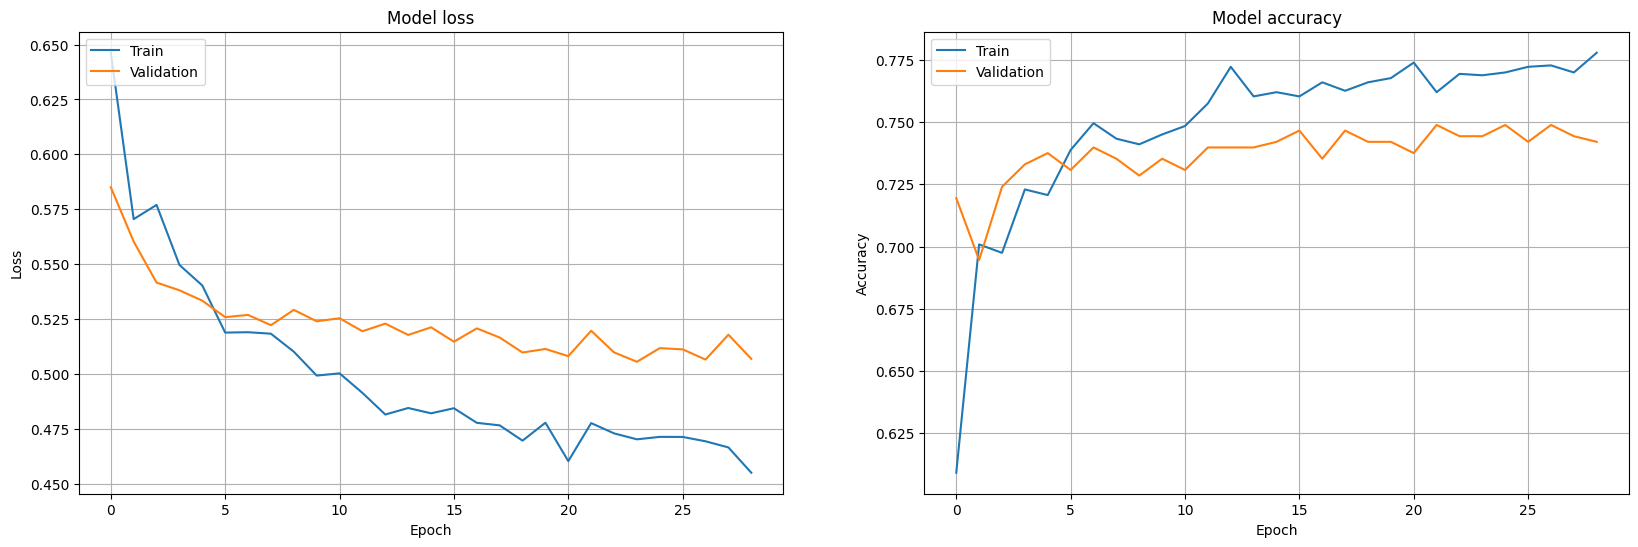

In [156]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Plot loss
ax[0].plot(history.history['loss'], label='Train')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_title('Model loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='upper left')
ax[0].grid(True)

# Plot accuracy
ax[1].plot(history.history['accuracy'], label='Train')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_title('Model accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='upper left')
ax[1].grid(True)
plt.show()